In [1]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
import bs4 as bs
import nltk
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from wordcloud import WordCloud
from PIL import Image
from pandarallel import pandarallel

In [2]:
'''nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw')
nltk.download('punkt')'''

"nltk.download('stopwords')\nnltk.download('words')\nnltk.download('wordnet')\nnltk.download('omw')\nnltk.download('punkt')"

In [3]:
data = pd.read_csv('QueryResults.csv')

In [4]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,<p>consider the <code>pd.Series</code> <code>s...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,"<p>I've been using <a href=""https://stackoverf...",<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",<p>I am trying to install a Java application o...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,<p>Is there some library that allows me to eas...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"<p><strong>EDIT</strong> (the whole question, ...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [5]:
#delete balises html with beautiful soup
def clean_html(text):
    soup = bs.BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Body'] = data['Body'].apply(clean_html)

In [6]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>,40101130,9,7584,0.0,6
1,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>,662383,197,388401,0.0,19
2,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>,662421,122,622820,0.0,12
3,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>,3520133,9,10228,0.0,6
4,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>,1396164,9,18554,0.0,12


In [7]:
data.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
42429,"Using Guice, how do I inject the super class's...",\nPossible Duplicate:\nGuice with parents \n\n...,<java><inheritance><dependency-injection><cons...,9014905,6,11676,0.0,2
28805,Android - How to take an EditText (numbers) th...,I am wondering how to take an EditText area th...,<java><android><integer><textview><android-edi...,6948735,7,36054,0.0,4
8935,Implementing GoogleApiClient on Android mvp us...,"there is a couple of question I have,\nfirst, ...",<android><dependency-injection><android-6.0-ma...,39860402,10,2193,0.0,1
30747,How to find null byte in a string in Python?,I'm having an issue parsing data after reading...,<python><string><list><null><byte>,18970830,12,46966,0.0,4
5386,MySQL: Eliminating duplicate rows without brea...,I've got a customer database filled with norma...,<php><mysql><sql><normalization><duplicates>,20232799,6,1699,NaN,2


In [8]:
data = data[['Title', 'Body', 'Tags', 'Id']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
 3   Id      50000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [10]:
data.nunique()

Title    49999
Body     50000
Tags     49190
Id       50000
dtype: int64

In [11]:
data.isna().sum()

Title    0
Body     0
Tags     0
Id       0
dtype: int64

In [12]:
data.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,49999,50000,49190
top,A potentially dangerous Request.Form value was...,consider the pd.Series s\nimport pandas as pd\...,<angular><typescript><ionic-framework><ionic2>...
freq,2,1,24


In [13]:
data.Body.apply(lambda i : len(i))

0         754
1         585
2        2111
3        1307
4        1165
         ... 
49995     195
49996    2821
49997     450
49998    1179
49999    1449
Name: Body, Length: 50000, dtype: int64

<AxesSubplot: xlabel='Body', ylabel='Density'>

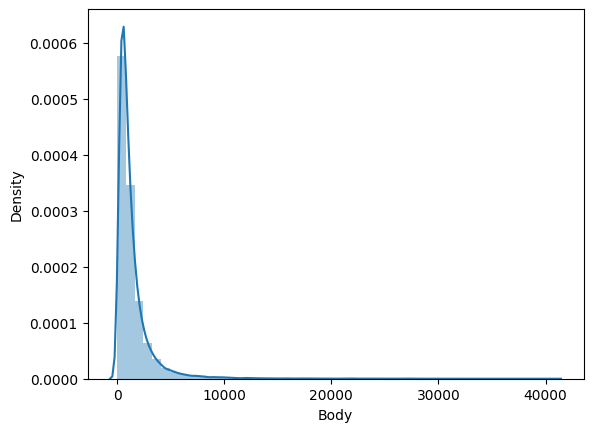

In [14]:
tmp = data.Body.str.len()
sns.distplot(tmp)

<AxesSubplot: xlabel='Title', ylabel='Density'>

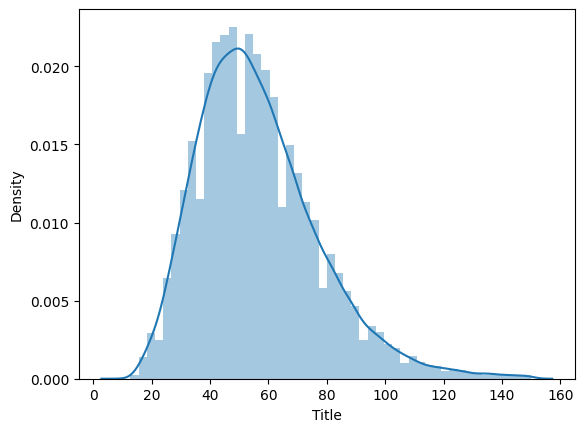

In [15]:
tmp = data.Title.str.len()
sns.distplot(tmp)

In [16]:
data.shape

(50000, 4)

In [17]:
for idx, ser in data.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

Best Practice for creating Web Services
To preface I am new to web development. I am looking at creating a core set of RESTful web services around a valuable document library of sorts (initial CRUD abilities). In doing so I am theoretically creating a perfectly re-usable and scalable back-end to be used by unanticipated applications in the future. 
My question centers around the best practice for doing this. My initial requirement has me also creating a unique front end. Would I make the front end and back end completely separate projects to enhance the re-usability. It would increase overhead.
Looking at using GWT, Restlet, and the Java EE technology stack if this influences the setup at all.

<java><web-services><rest><gwt><restlet>

------------------------------------------------------------------------------------------------------------------------

How to pass data from one page to another for Navigation in Ionic 2
I am Beginner in Ionic 2. I want to pass Json data from one page

In [18]:
data.set_index('Id', inplace=True)

In [19]:
data.head()

,Title,Body,Tags
Id,,,
40101130,how do I calculate a rolling idxmax,consider the pd.Series s\nimport pandas as pd\...,<python><pandas><numpy><dataframe><series>
662383,Better techniques for trimming leading zeros i...,I've been using this for some time:\nSUBSTRING...,<sql><sql-server><sql-server-2005><tsql><string>
662421,"""No X11 DISPLAY variable"" - what does it mean?",I am trying to install a Java application on m...,<java><linux><variables><x11><headless>
3520133,Object-Oriented Callbacks for C++?,Is there some library that allows me to easily...,<c++><oop><callback><pointer-to-member><eiffel>
1396164,Why doesn't .NET find the OpenSSL.NET dll?,"EDIT (the whole question, it was too unclear)\...",<c#><.net><dll><dllimport><dllnotfoundexception>


In [20]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', "'", '"', '!', ';', '``', "''", '...', '’', '“', '”']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [21]:
X = data['Body'].apply(lambda i : transform_bow_lem_fct(i))

In [22]:
df = pd.DataFrame(X)
df['Title'] = data['Title'].apply(lambda i : transform_bow_lem_fct(i))
df ['Tags'] = data['Tags']

In [23]:
df.head()

,Body,Title,Tags
Id,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 40101130 to 53180854
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    50000 non-null  object
 1   Title   50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [25]:
for idx, ser in df.sample(3).iterrows():
      print(ser['Title'])
      print(ser['Body'])
      print(ser['Tags'])
      print('')
      print('----'*30)
      print('')

the specified cast materialized 'system.guid type 'system.int32 type valid
the specified cast materialized 'system.guid type 'system.int32 type valid several wcf service concurrency mode multiple instancecontextmode single our architecture focus loosely coupled model using constructor based dependency injection this turn implemented using unity 2.0 web.config service mapping interface type defined unity container section one dependency dal assembly data access layer us entity framework communicate mssql server the class talking database also included unity mapping everything great run integration test but move performance environment run load test concurrent user start seeing following error system.invalidoperationexception the 'auth_token property 'session could set 'int32 value you must set property non null value type 'guid with following stack system.data.common.internal.materialization.shaper.errorhandlingvaluereader 1.getvalue dbdatareader reader int32 ordinal system.data.common.

In [26]:
df.shape

(50000, 3)

In [27]:
df['text'] = df['Title'] + '    ' + df['Body']

In [28]:
df.head()

,Body,Title,Tags,text
Id,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...


In [29]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.9, min_df=2)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Title'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])  
ctf_transform = ctf.transform(df[feat])  

In [30]:
cv_transform

<50000x10224 sparse matrix of type '<class 'numpy.int64'>'
	with 269320 stored elements in Compressed Sparse Row format>

In [31]:
df['bags_of_words'] = list(cv_transform.toarray())

In [32]:
df.head()

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
df.Title.sample()

Id
71440    set usercontrol property not show property window
Name: Title, dtype: object

In [34]:
cv_fit.vocabulary_.get('python')

6988

In [35]:
#find the most common words
def get_top_n_words(corpus, n=None):
      vec = CountVectorizer().fit(corpus)
      bag_of_words = vec.transform(corpus)
      sum_words = bag_of_words.sum(axis=0) 
      words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
      words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
      return words_freq[:n]

In [36]:
get_top_n_words(df.Title, 10)

[('how', 10144),
 ('using', 3853),
 ('file', 2573),
 ('use', 1915),
 ('error', 1854),
 ('net', 1829),
 ('what', 1793),
 ('android', 1717),
 ('python', 1595),
 ('java', 1594)]

In [37]:
df.head()

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,<python><pandas><numpy><dataframe><series>,calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,<sql><sql-server><sql-server-2005><tsql><string>,better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,<java><linux><variables><x11><headless>,x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,<c++><oop><callback><pointer-to-member><eiffel>,object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,<c#><.net><dll><dllimport><dllnotfoundexception>,why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [38]:
df['Tags'] = df['Tags'].apply(lambda i : i.split('><'))

df['Tags'] = df['Tags'].apply(lambda i : [x.replace('<', '').replace('>', '') for x in i])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 40101130 to 53180854
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Body           50000 non-null  object
 1   Title          50000 non-null  object
 2   Tags           50000 non-null  object
 3   text           50000 non-null  object
 4   bags_of_words  50000 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [40]:
df

,Body,Title,Tags,text,bags_of_words
Id,,,,,
40101130,consider pd.series import panda import numpy n...,calculate rolling idxmax,"[python, pandas, numpy, dataframe, series]",calculate rolling idxmax consider pd.series...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662383,'ve using time substring str_col patindex str_...,better technique trimming leading zero sql server,"[sql, sql-server, sql-server-2005, tsql, string]",better technique trimming leading zero sql ser...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
662421,trying install java application linux machine ...,x11 display variable mean,"[java, linux, variables, x11, headless]",x11 display variable mean trying install ja...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3520133,library allows easily conveniently create obje...,object oriented callback,"[c++, oop, callback, pointer-to-member, eiffel]",object oriented callback library allows eas...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1396164,edit whole question unclear want use openssl.n...,why n't .net find openssl.net dll,"[c#, .net, dll, dllimport, dllnotfoundexception]",why n't .net find openssl.net dll edit whol...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
3915827,cil code ldftn used get function pointer addre...,get 'ldftn function pointer,"[c#, .net, clr, function-pointers, cil]",get 'ldftn function pointer cil code ldftn ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71419635,used following step integrating pip picture pi...,how add picture picture pip webrtc video call ...,"[ios, swift, webrtc, ios15, videocall]",how add picture picture pip webrtc video call ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22050813,get warning logcat developing caused app 16699...,warning caused app implicit intent startservic...,"[android, android-intent, warnings, logcat, an...",warning caused app implicit intent startservic...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [41]:
#Multioutput classifier for tags

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

y = mlb.fit_transform(df['Tags'])

pd.DataFrame(y, columns=mlb.classes_).head()

,.a,.class-file,.doc,.emf,.hgtags,.htaccess,.htpasswd,.lib,.net,.net-1.1,.net-2.0,.net-3.0,.net-3.5,.net-4.0,.net-4.5,.net-4.5.2,.net-4.6,.net-4.6.1,.net-4.6.2,.net-4.7,.net-4.8,.net-5,.net-6.0,.net-assembly,.net-attributes,.net-core,.net-core-1.1,.net-core-2.0,.net-core-2.1,.net-core-2.2,.net-core-3.0,.net-core-3.1,.net-core-rc1,.net-core-rc2,.net-framework-version,.net-internals,.net-micro-framework,.net-native,.net-reflector,.net-remoting,.net-standard,.net-standard-1.5,.net-standard-2.0,.net-standard-2.1,.net-trace,.netrc,.npmrc,.obj,.profile,.refresh,.so,16-bit,2-legged,2-way-object-databinding,24-bit,256color,2d,2d-games,3-tier,3-way-merge,32-bit,3270,32bit-64bit,32feet,3d,3d-model,3d-modelling,3d-reconstruction,3d-secure,3des,3dsmax,3dtouch,3g,3nf,4g,64-bit,6502,68000,68hc12,7zip,80286,8051,8085,a-star,a2dp,aabb,aac,aapt,aapt2,aar,aasm,ab-testing,abac,abaddressbook,abandonedmutexexception,abap,abbreviation,abbyy,abc,abcl,...,yocto,youcompleteme,yourkit,youtube,youtube-api,youtube-channels,youtube-data-api,youtube-dl,youtube-javascript-api,yslow,ysod,ytplayer,ytplayerview,yui,yui-charts,yui-compressor,yum,yup,yuv,z-index,z-order,z3,z80,zabbix,zap,zapier,zappa,zbar,zbar-sdk,zbuffer,zcat,zebra-printers,zebra-striping,zedgraph,zeep,zemanta,zend-acl,zend-auth,zend-controller,zend-db,zend-db-select,zend-db-table,zend-file,zend-form,zend-framework,zend-framework2,zend-layout,zend-mail,zend-pdf,zend-rest,zend-rest-route,zend-studio,zend-test,zend-translate,zend-validate,zend-view,zentest,zepto,zero,zero-copy,zero-pad,zero-padding,zeroclipboard,zeroconf,zeromq,zeus,zfs,zigbee,zigzag,zingchart,zip,zipalign,ziparchive,zipcode,zipinputstream,zipkin,zipper,zlib,zodb,zombie-process,zombie.js,zone.js,zoneddatetime,zoo,zooming,zope,zos,zpl,zpl-ii,zsh,zsh-zle,zshrc,zsi,zstack,zstandard,zstd,zune,zurb-foundation,zxing,zynq
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
#Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Title'], df['Tags'], test_size=0.2, random_state=42)

In [52]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import glob


#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

In [53]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_titles = lemmatization(data.Title)
print (lemmatized_titles[0][0:90])

calculate rolling idxmax


In [60]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words_titles = gen_words(lemmatized_titles)

print (data_words_titles[0:5])

[['calculate', 'rolling', 'idxmax'], ['well', 'technique', 'trim', 'lead', 'zero'], ['display', 'variable', 'mean'], ['object', 'orient'], ['net', 'find']]


In [55]:
id2word = corpora.Dictionary(data_words_titles)

corpus = []
for text in data_words_titles:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1)]
calculate


In [56]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [57]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21    -0.496964  0.143363       1        1  8.984495
4      0.193302 -0.470242       2        1  8.316803
26     0.421581  0.246963       3        1  7.256978
18     0.286418  0.389269       4        1  5.907883
24     0.432258 -0.217249       5        1  5.534516
19    -0.010982 -0.459533       6        1  5.425256
8     -0.173400  0.441460       7        1  5.348027
12     0.447394  0.082544       8        1  4.905409
16    -0.397892 -0.246503       9        1  4.767164
0     -0.442165 -0.059204      10        1  4.466361
29    -0.320568  0.322937      11        1  4.262986
1     -0.140734 -0.392938      12        1  3.913902
3     -0.264186 -0.338313      13        1  3.875176
27     0.418325 -0.048792      14        1  3.675919
17     0.050155  0.449092      15        1  3.440808
9      0.273931 -0.192951      16        1  2.997600
11     0.191332 -0.307507      17        1  2.703242
25    -0.316845  0.125450      18        1  2.456652
28    -0.272622 -0.120606      19        1  2.302095
5      0.064032  0.311198      20        1  1.950155
2      0.175296  0.198794      21        1  1.610048
20    -0.145929  0.142855      22        1  1.456596
14    -0.079565  0.243973      23        1  1.356169
22     0.027025 -0.217113      24        1  1.222028
6      0.154045  0.044708      25        1  0.800358
23    -0.087562 -0.076893      26        1  0.462894
15     0.031747 -0.038852      27        1  0.295292
7     -0.005813  0.014696      28        1  0.102052
10    -0.005806  0.014698      29        1  0.101567
13    -0.005809  0.014697      30        1  0.101567, topic_info=            Term          Freq         Total Category  logprob  loglift
29           use  17803.000000  17803.000000  Default  30.0000  30.0000
150         file   6866.000000   6866.000000  Default  29.0000  29.0000
97         error   4924.000000   4924.000000  Default  28.0000  28.0000
75           get   5402.000000   5402.000000  Default  27.0000  27.0000
251         work   3698.000000   3698.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
24   application      0.018029   2240.541136  Topic30  -9.3948  -4.8380
25         build      0.018029   1568.207594  Topic30  -9.3948  -4.4813
26        deploy      0.018029    253.548791  Topic30  -9.3948  -2.6591
28         proxy      0.018029    171.312456  Topic30  -9.3948  -2.2671
29           use      0.018029  17803.068556  Topic30  -9.3948  -6.9107

[1310 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
32        2  0.986758  abstract
35       24  0.997553    access
88        2  0.999227       add
161      17  0.997977   android
231       3  0.997323   angular
...     ...       ...       ...
235      13  0.982551   webview
6        27  0.983296      well
82       12  0.998085    window
251       7  0.999416      work
77        7  0.997239       xml

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 5, 27, 19, 25, 20, 9, 13, 17, 1, 30, 2, 4, 28, 18, 10, 12, 26, 29, 6, 3, 21, 15, 23, 7, 24, 16, 8, 11, 14])

In [62]:
lemmatized_texts = lemmatization(data.Body)
print (lemmatized_texts[0][0:90])

NameError: name 'lemmatized_text' is not defined

In [63]:
data_words = gen_words(lemmatized_texts)
print (data_words[0][0:20])

['consider', 'import', 'panda', 'import', 'numpy', 'np', 'random', 'seed', 'list', 'abcdefghij', 'dtype', 'want', 'get', 'index', 'value', 'rolling', 'window', 'dtype', 'float', 'want']


In [64]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 4), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3)]
abcdefghij


In [65]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis